In [73]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [74]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [99]:
df_edge = pd.read_csv('twitch\ES\musae_ES_edges.csv')
df_target = pd.read_csv('twitch\ES\musae_ES_target.csv')

In [100]:
df_target = df_target[df_target.partner.eq(True)]
df_target = df_target[df_target.mature.eq(True)]

In [101]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [102]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [79]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  107
EDGES:  525
DENSITY:  0.046
CLUSTERING:  0.16292895466468396


In [80]:
nx.clustering(graph)

{5: 0,
 4001: 0.1,
 19: 0.3333333333333333,
 2701: 0.14285714285714285,
 367: 0.16666666666666666,
 3630: 0.19047619047619047,
 562: 0.23214285714285715,
 68: 0.18421052631578946,
 2865: 0.19210526315789472,
 1143: 0.29545454545454547,
 2847: 0.08333333333333333,
 2388: 0.11772486772486772,
 1217: 0.15151515151515152,
 2399: 0.20833333333333334,
 4142: 0.1268472906403941,
 109: 0.20909090909090908,
 3186: 0.35714285714285715,
 2475: 0.11319073083778966,
 182: 0.15367965367965367,
 1919: 0.24545454545454545,
 809: 0.18055555555555555,
 3122: 0.19473684210526315,
 1438: 0.2222222222222222,
 1455: 0.14912280701754385,
 3784: 0.2638888888888889,
 1026: 0.2222222222222222,
 1715: 0.16013071895424835,
 2205: 0.3106060606060606,
 3111: 0.23809523809523808,
 4208: 0.10784313725490197,
 2336: 0.19444444444444445,
 3644: 0.25,
 1695: 0.23333333333333334,
 347: 0,
 724: 0.14935064935064934,
 4415: 0.1794871794871795,
 536: 0.08333333333333333,
 2506: 0.11538461538461539,
 419: 0.16666666666666666

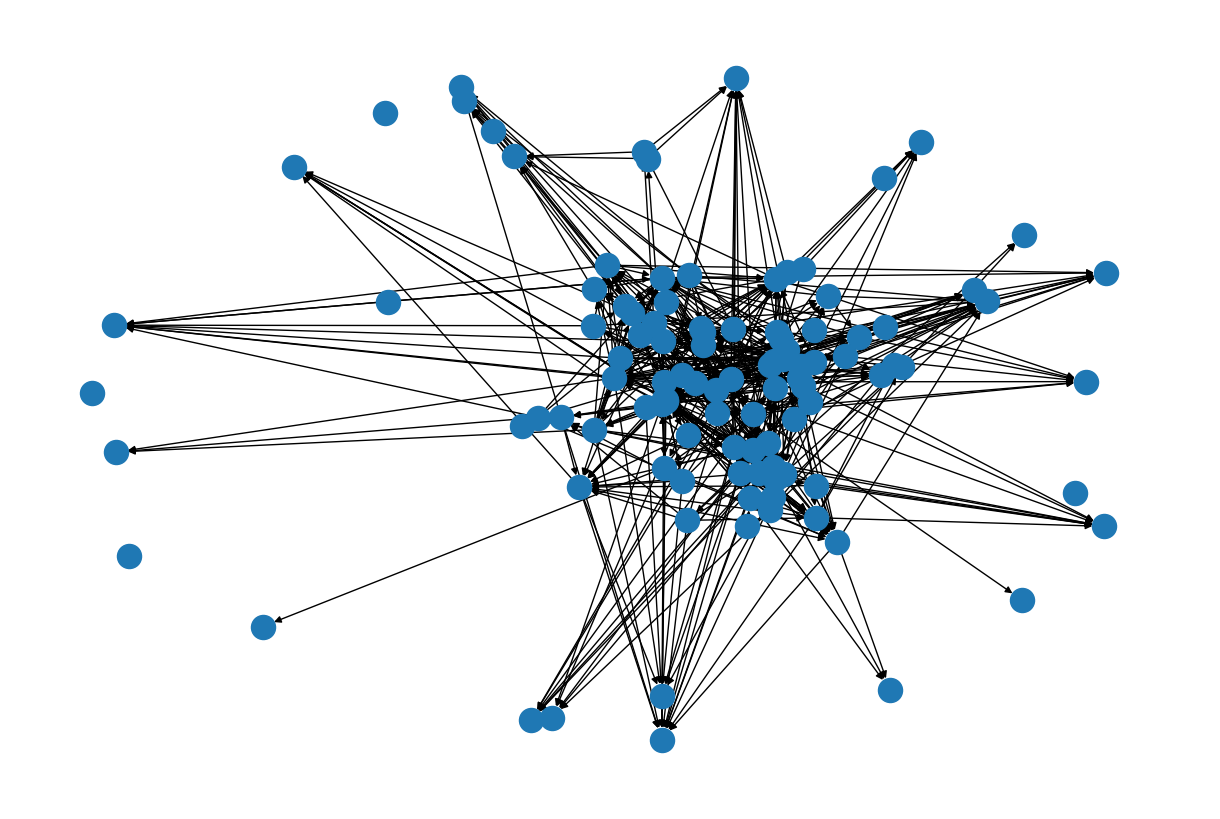

In [81]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

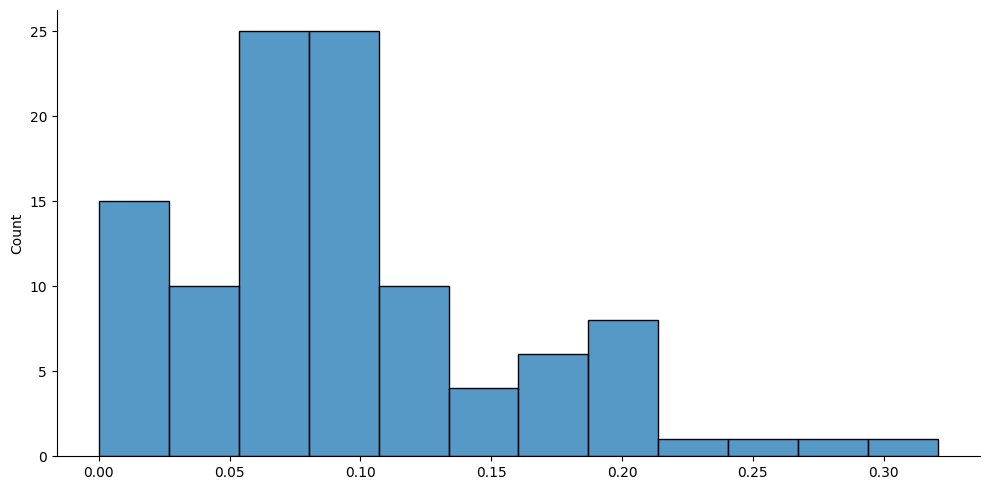

In [82]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

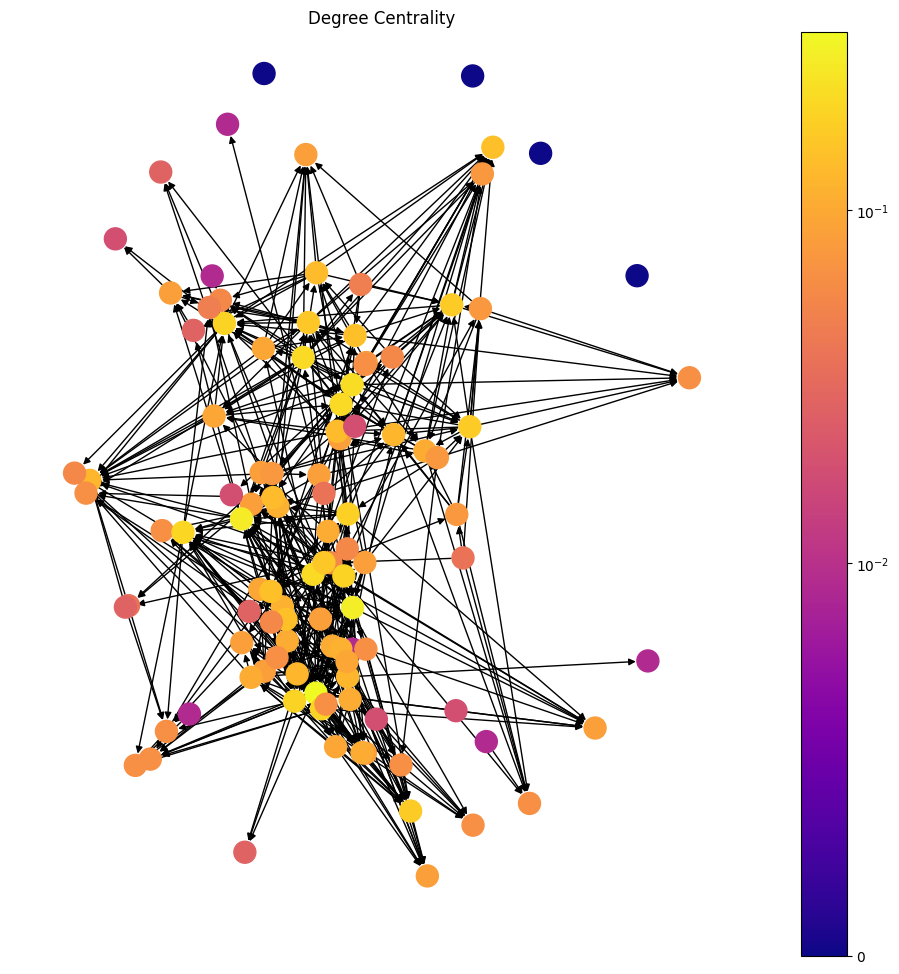

In [83]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

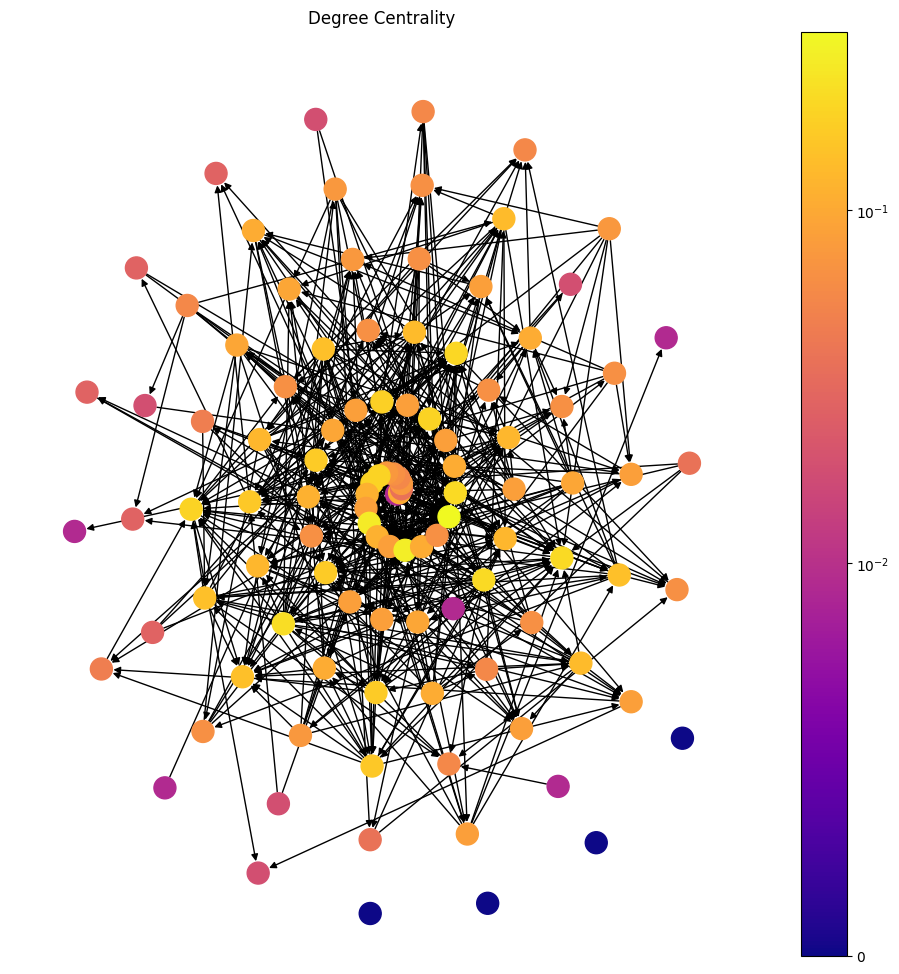

In [84]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

<AxesSubplot:>

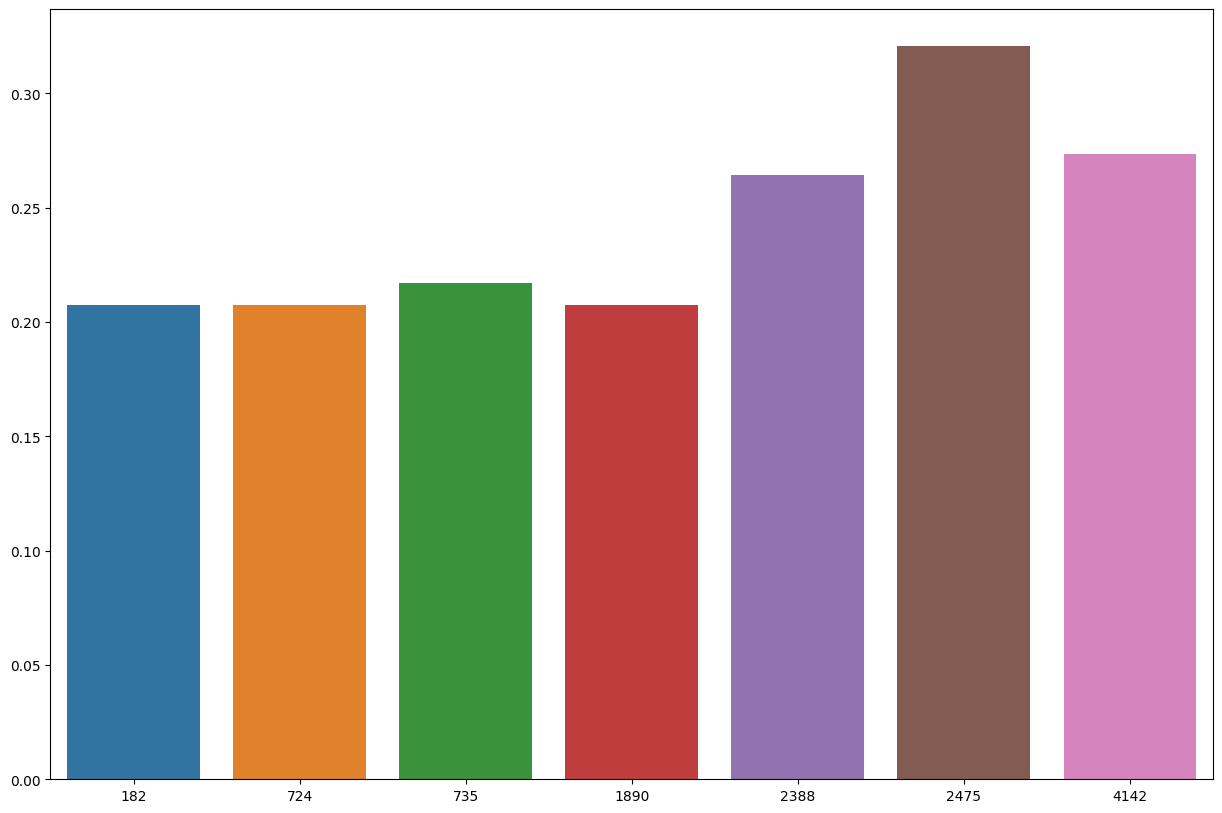

In [85]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

{2388: Text(0.08304095447411648, 0.12410758725097834, '2388'),
 4142: Text(-0.13646826426454692, -0.09231006193029258, '4142'),
 2475: Text(-0.2554751460572774, -0.18904442258956006, '2475'),
 182: Text(-0.0541775297907788, -0.03193359714365427, '182'),
 724: Text(0.017774566610213028, 0.1762826180452882, '724'),
 735: Text(-0.060074724916308726, 0.10207122322399498, '735'),
 1890: Text(-0.17976913015158225, 0.43032993186438406, '1890')}

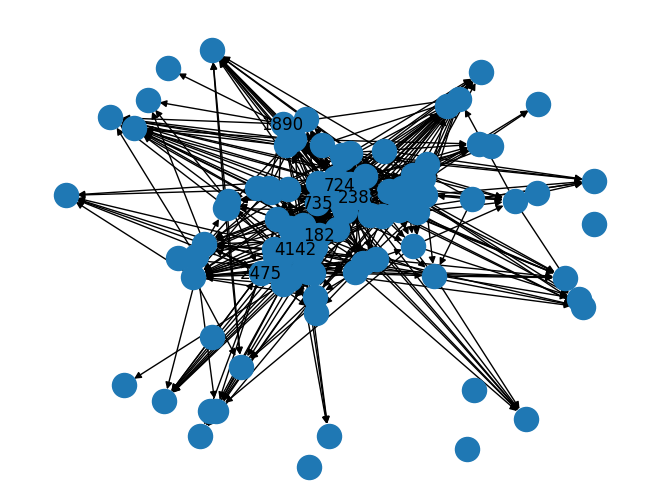

In [86]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

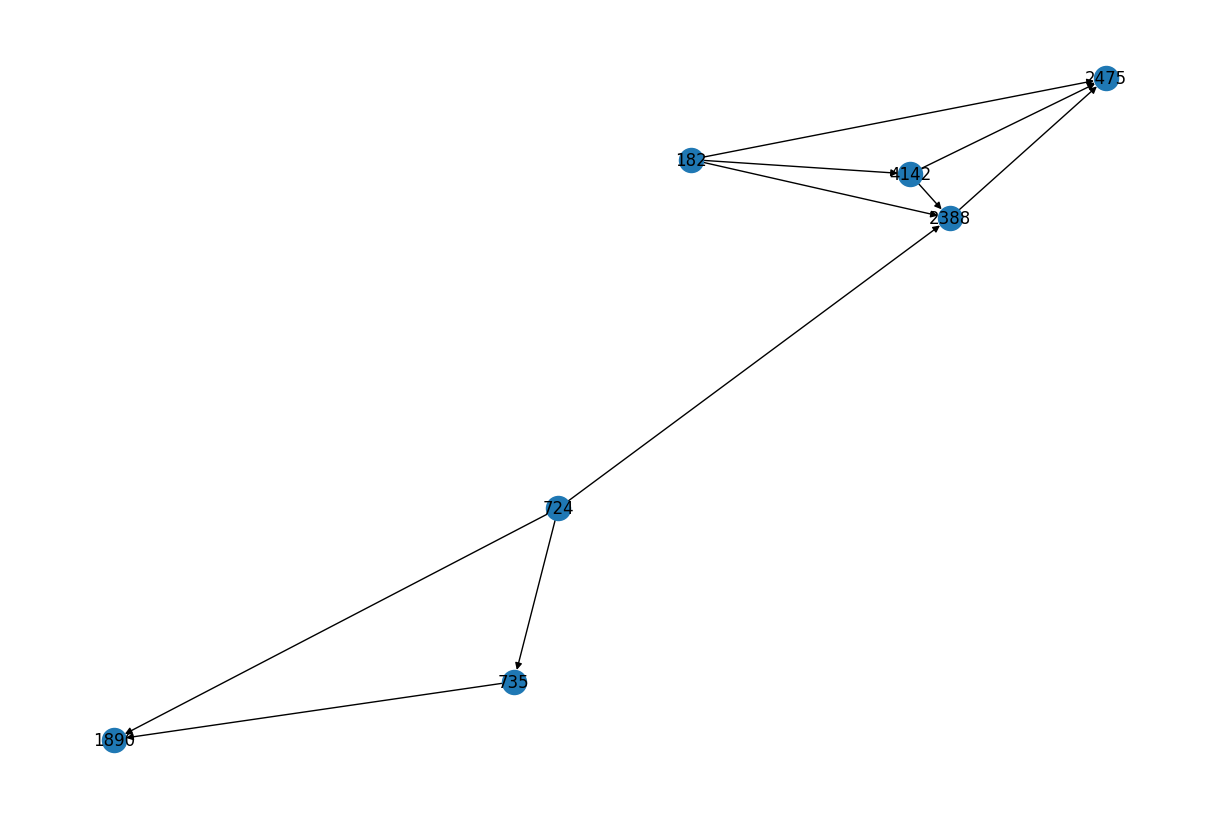

In [88]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_deg = nx.DiGraph()
graph_deg.add_edges_from(edges)
graph_deg.add_nodes_from(nodes)
pos_deg = nx.spring_layout(graph_deg)

plt.figure(figsize=(12,8))
nx.draw(graph_deg, pos_deg, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_deg, pos_deg, labels)
plt.show()

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

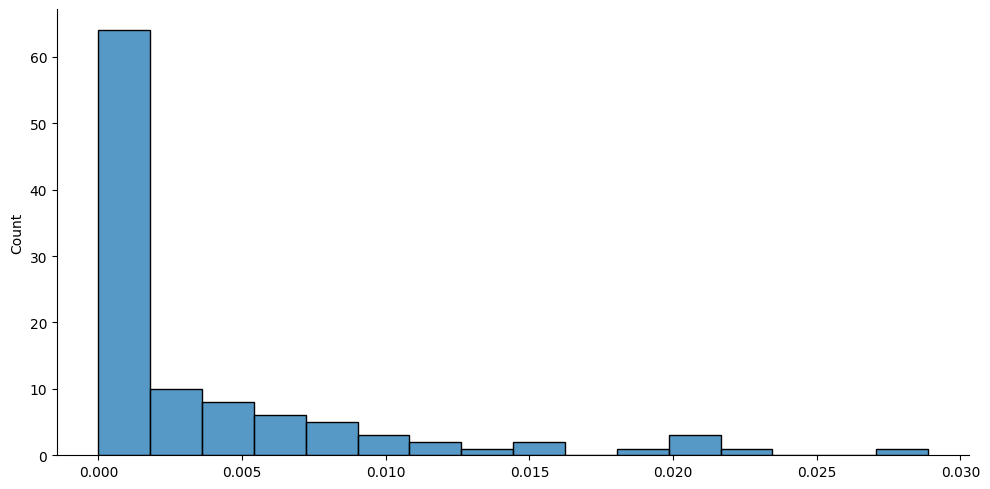

In [95]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

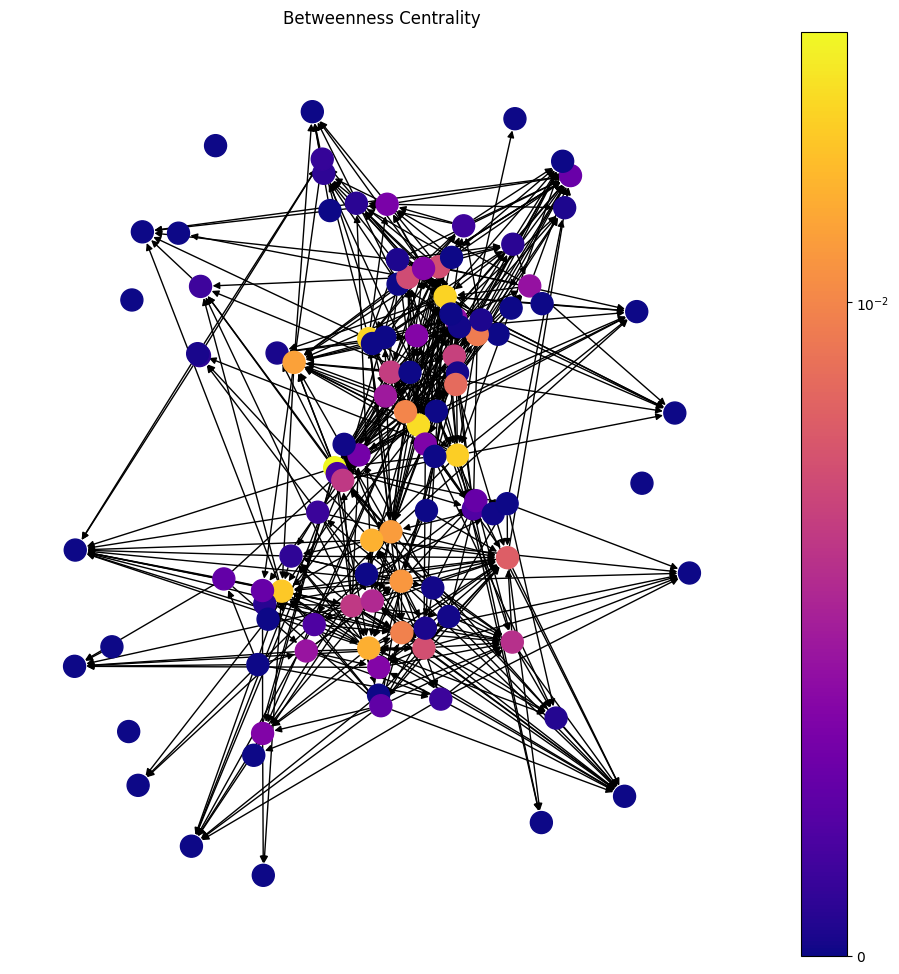

In [26]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

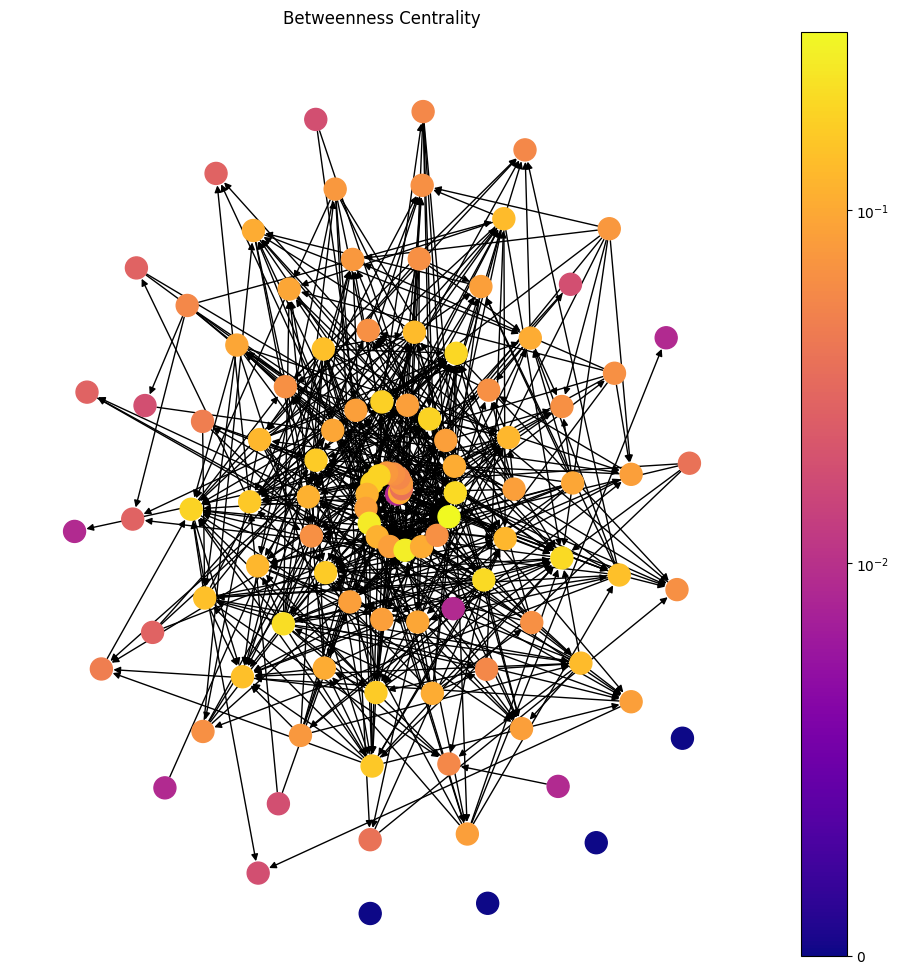

In [27]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{2388: Text(-0.07590843734129368, 0.11817751241352621, '2388'),
 4142: Text(0.048660533630505834, 0.039279725971413326, '4142'),
 2475: Text(-0.10056884888227921, 0.12428260140672268, '2475'),
 2278: Text(0.040474639730908105, 0.35043699684625385, '2278'),
 1444: Text(-0.0036869652859614337, 0.1786929541538581, '1444')}

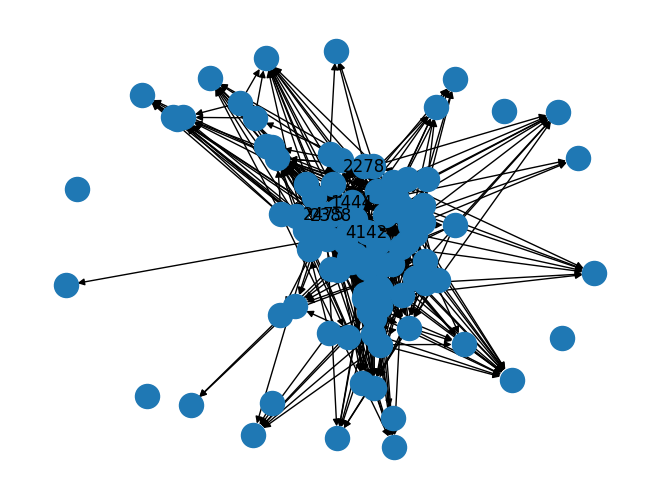

In [96]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

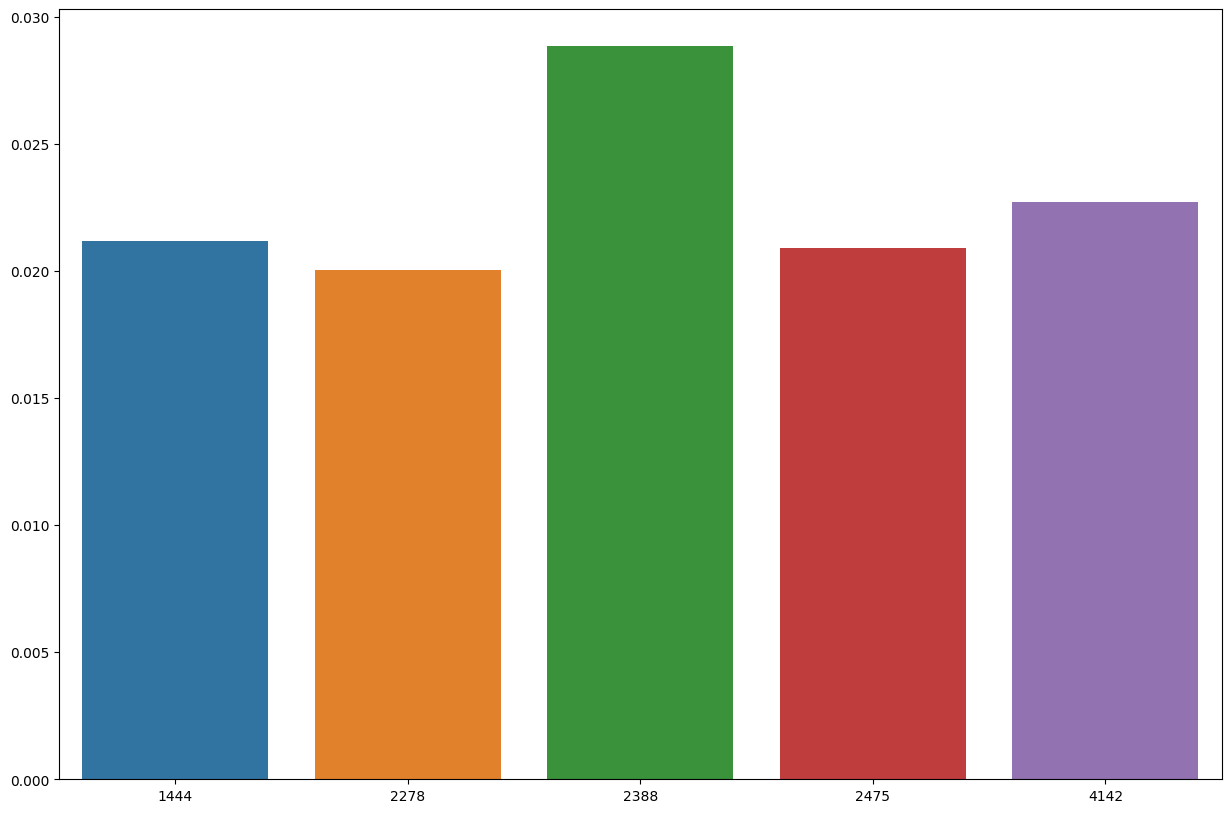

In [37]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in bet.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

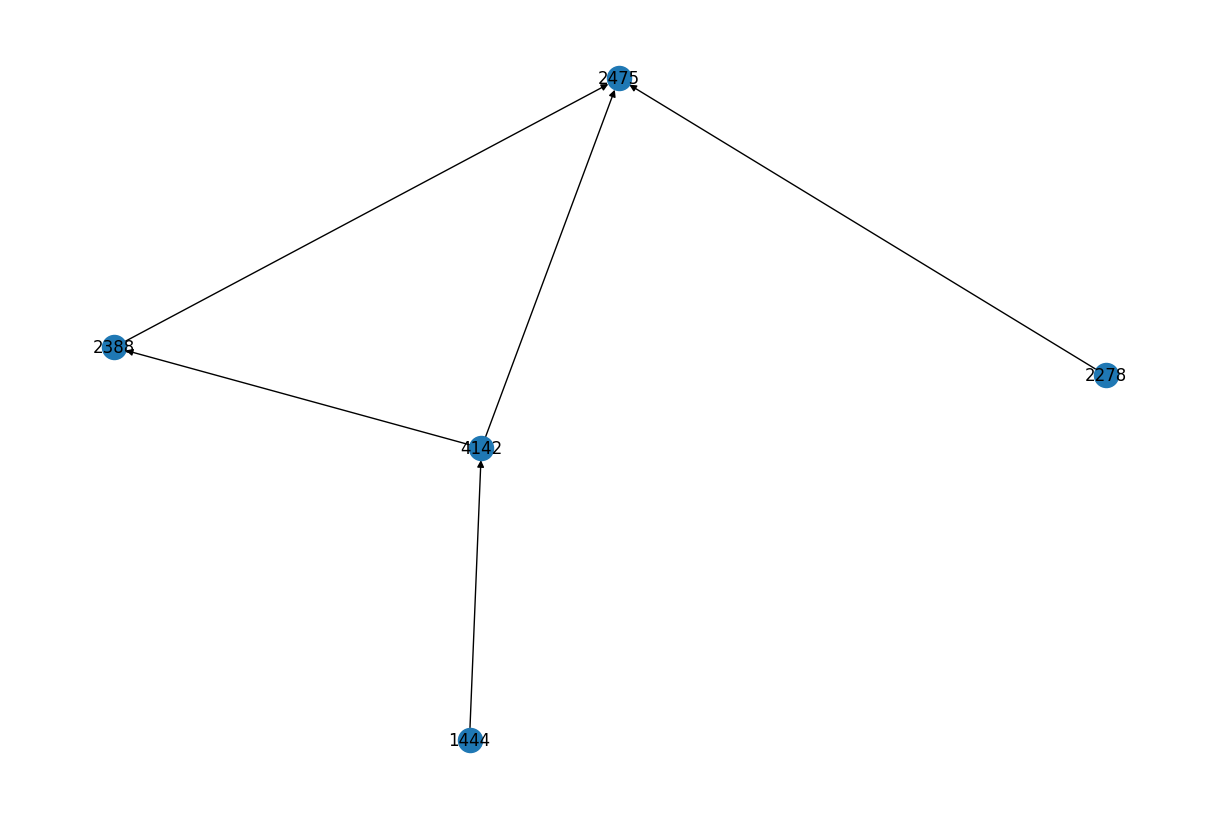

In [98]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_bet = nx.DiGraph()
graph_bet.add_edges_from(edges)
graph_bet.add_nodes_from(nodes)
pos_bet = nx.spring_layout(graph_bet)

plt.figure(figsize=(12,8))
nx.draw(graph_bet, pos_bet, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_bet, pos_bet, labels)
plt.show()

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

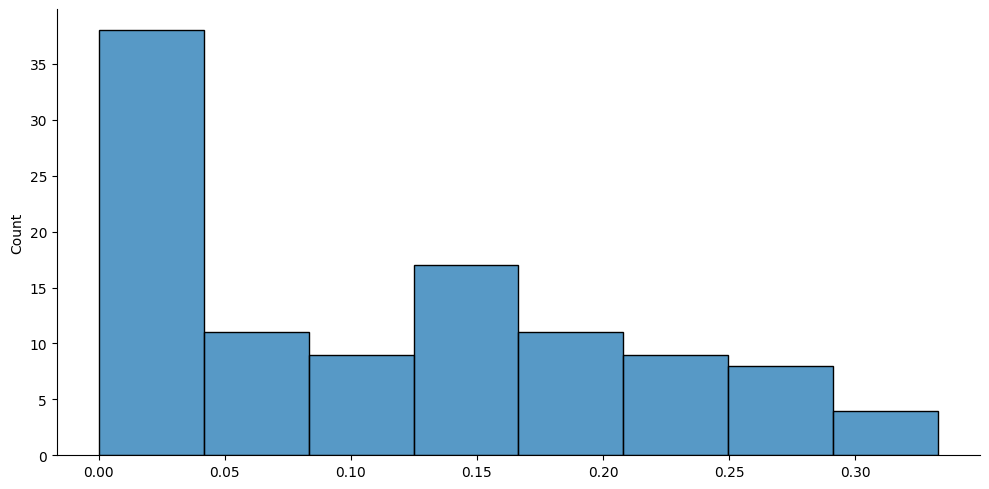

In [103]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

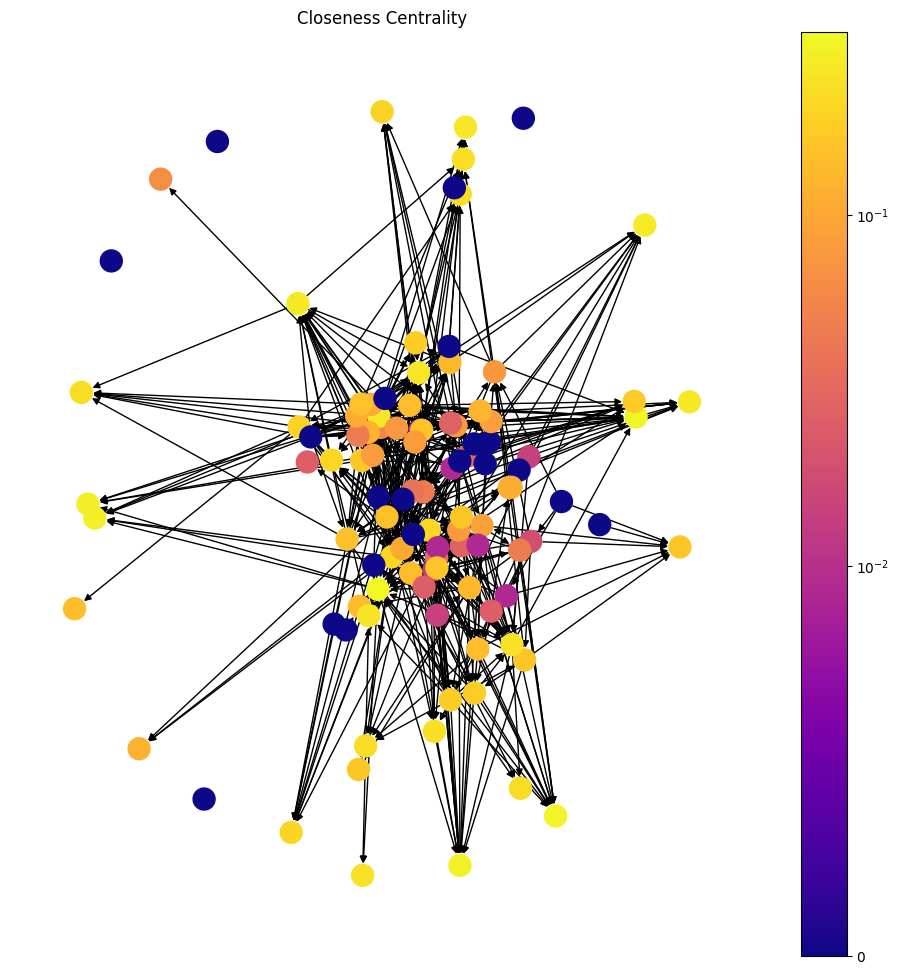

In [31]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

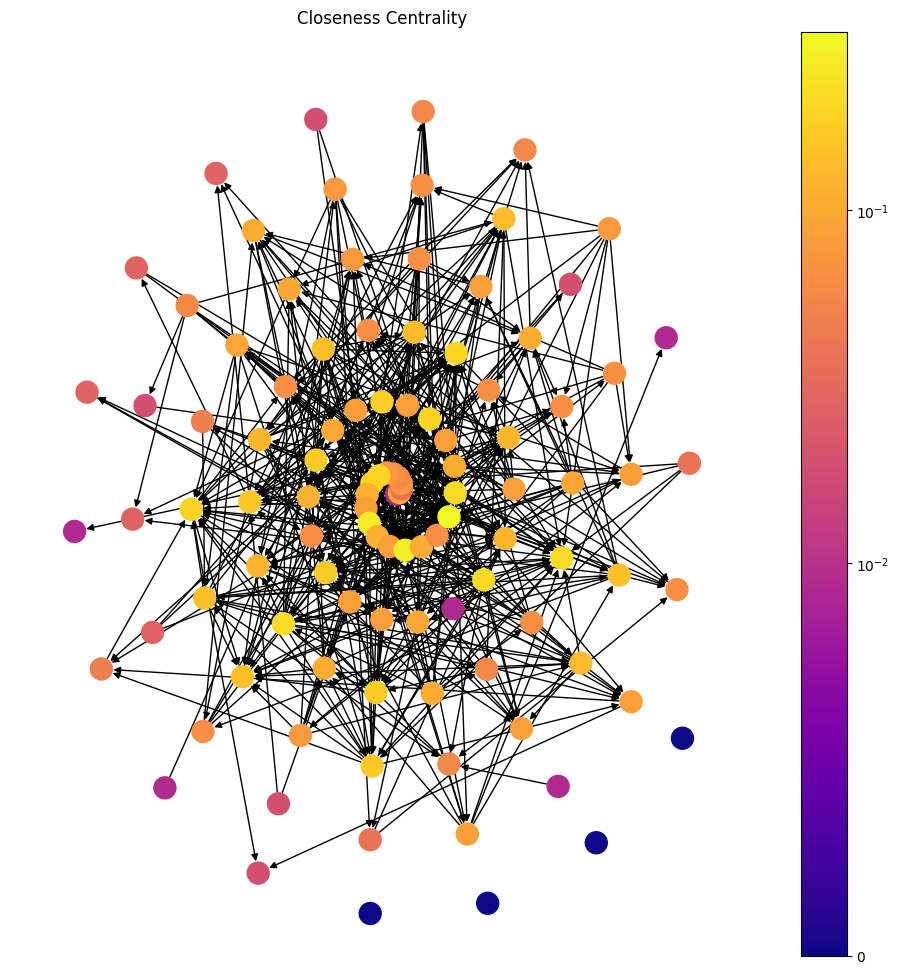

In [32]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{2865: Text(-0.03584148248535246, 0.10089109460532064, '2865'),
 2475: Text(-0.07939023261527149, -0.05894941262133112, '2475'),
 4208: Text(0.5431970051874865, -0.5648403387645627, '4208'),
 2336: Text(0.7106122470266701, -0.7588768810943548, '2336'),
 4415: Text(0.9314168985007206, 0.3155562514940061, '4415'),
 3387: Text(-0.46884608341829126, -0.0241280692382077, '3387'),
 2093: Text(-0.9187346334569123, -0.014746717264991816, '2093'),
 4341: Text(0.28318090356174425, -0.761168494558308, '4341'),
 4151: Text(-0.008041749953628767, -0.007626504221550473, '4151'),
 316: Text(-0.5640832959320423, 0.7755677533821227, '316'),
 4295: Text(-0.7974712338742688, -0.47407755108791005, '4295'),
 1535: Text(0.30835746782829204, -0.8735497180684748, '1535')}

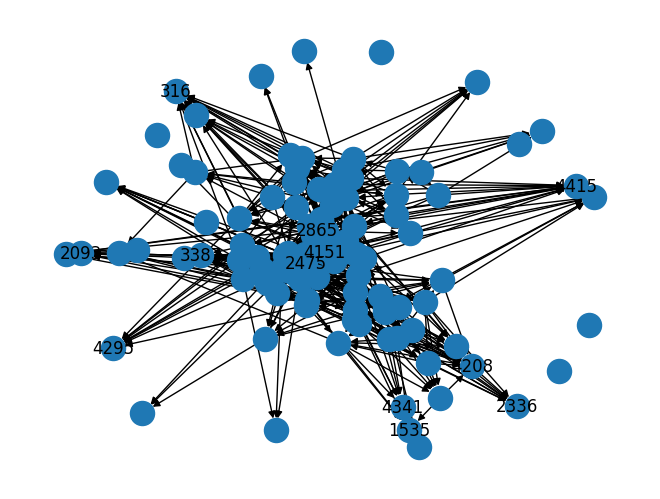

In [104]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.25: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

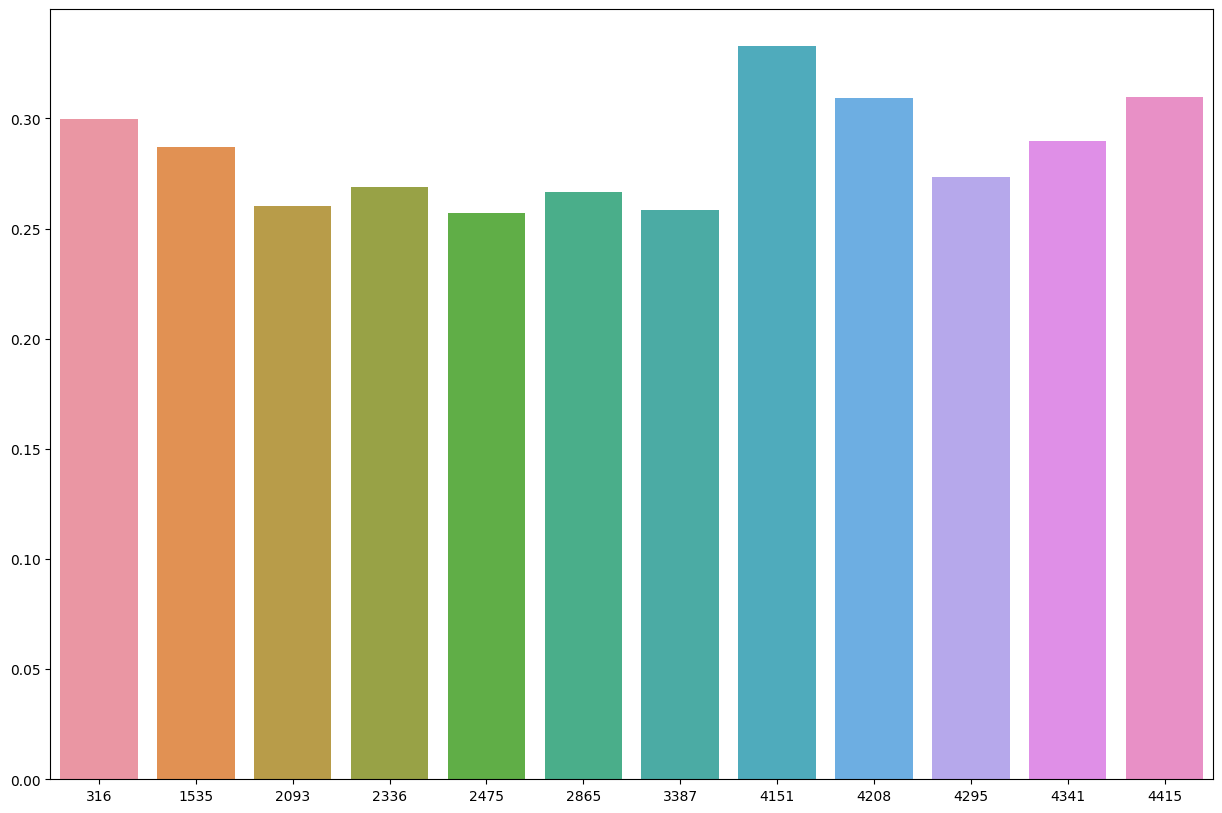

In [39]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in clos.items():
    if value > 0.25: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

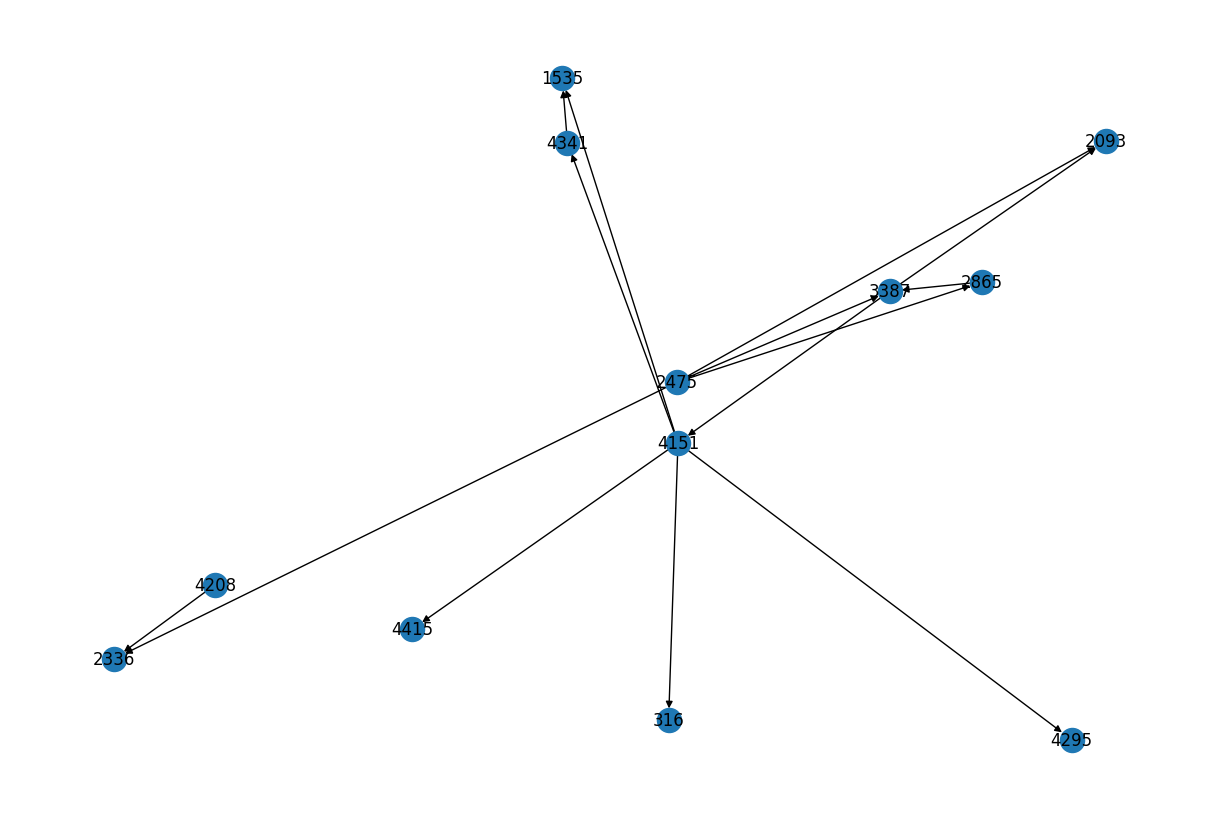

In [105]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_clos = nx.DiGraph()
graph_clos.add_edges_from(edges)
graph_clos.add_nodes_from(nodes)
pos_clos = nx.spring_layout(graph_clos)

plt.figure(figsize=(12,8))
nx.draw(graph_clos, pos_clos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_clos, pos_clos, labels)
plt.show()

Eigenvector Centrality

C:\Users\simod\AppData\Local\Temp\ipykernel_19720\1087020798.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

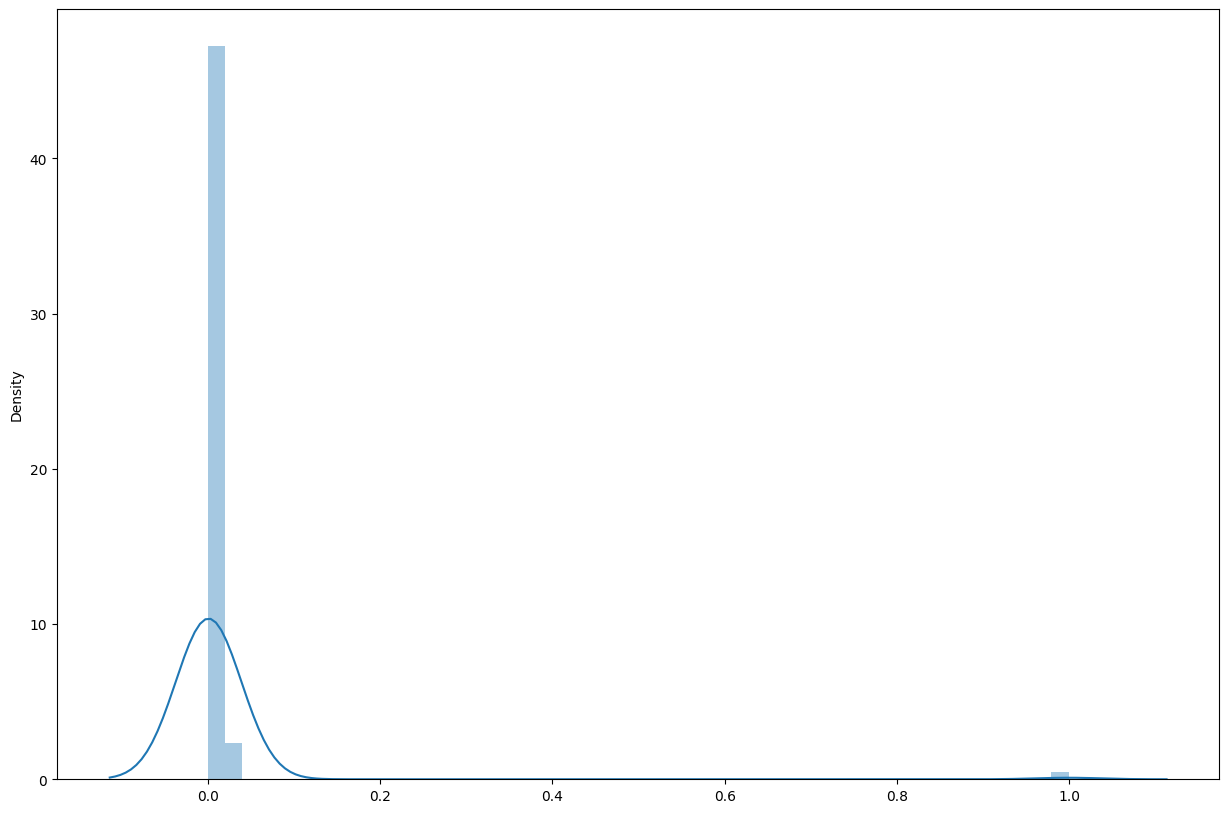

In [106]:
eigv = nx.eigenvector_centrality(graph, max_iter = 1000)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

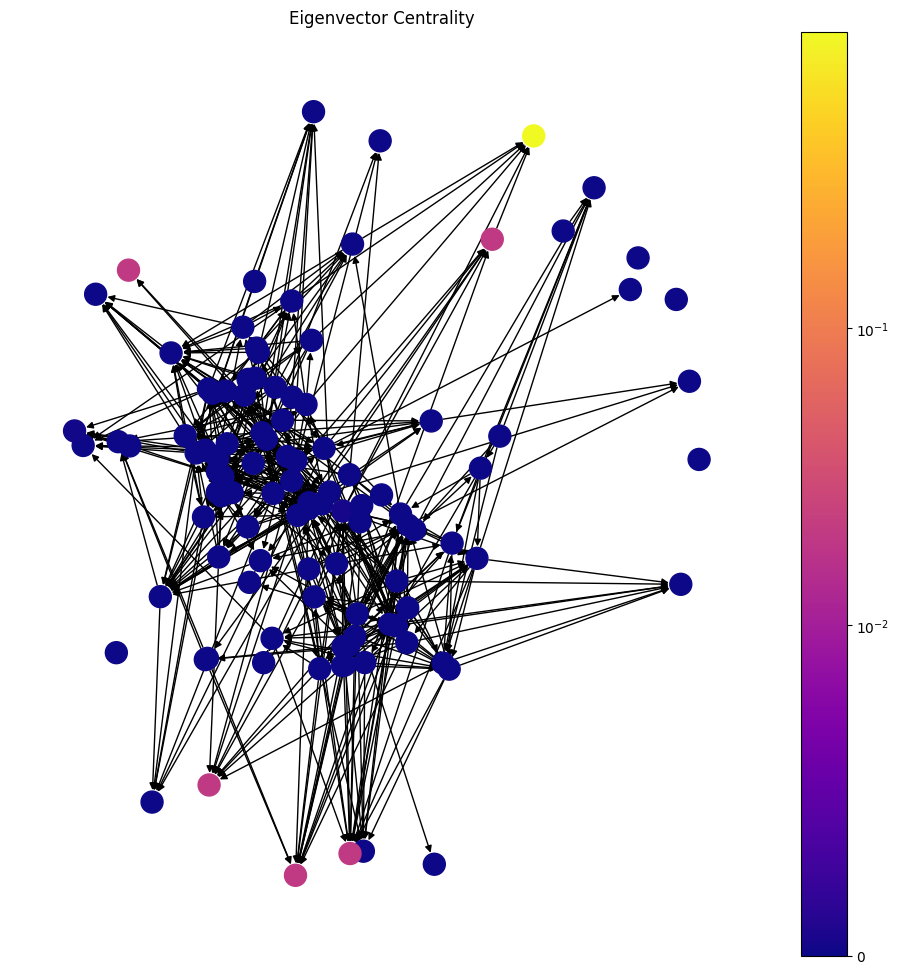

In [42]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

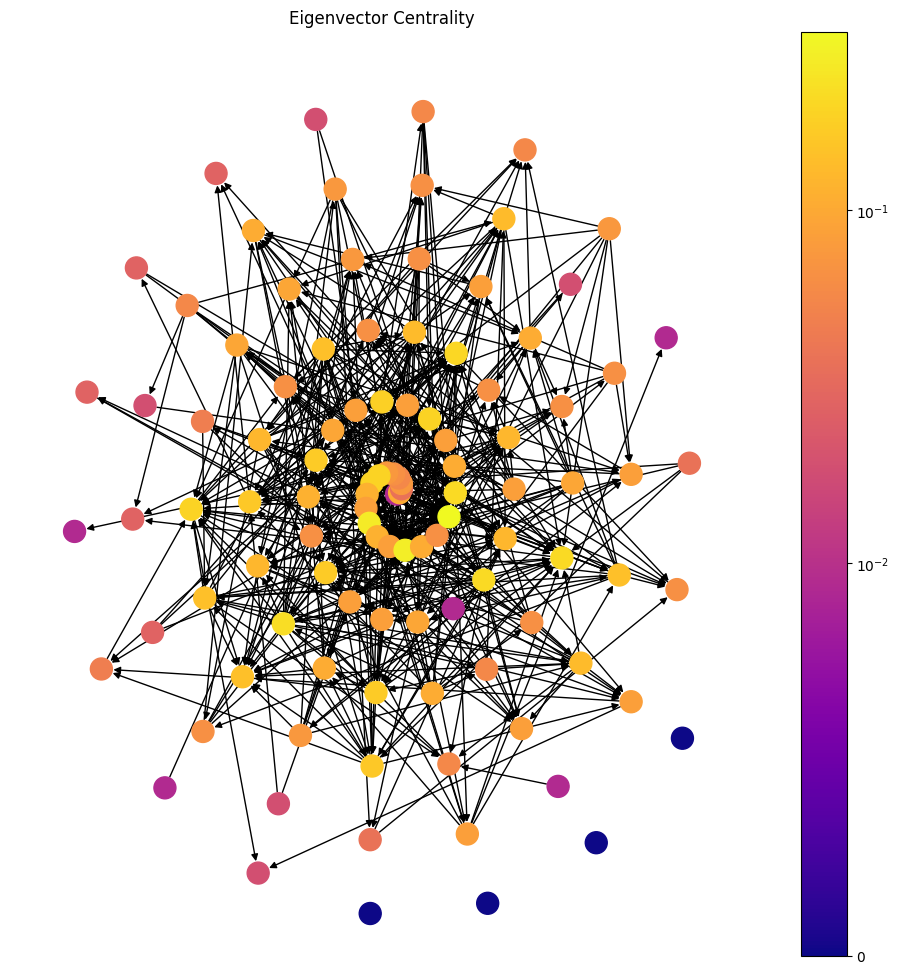

In [43]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{4415: Text(-0.549581931205839, 0.6227353362370837, '4415'),
 4341: Text(0.7656743707087208, -0.10092067634101852, '4341'),
 316: Text(-0.34077842197110086, -0.6898125647354069, '316'),
 4295: Text(-0.7140699430968722, -0.47725492202299896, '4295'),
 1535: Text(0.8136900557932014, -0.11412106279766565, '1535'),
 4606: Text(0.39450008759602256, 0.8420019193142532, '4606')}

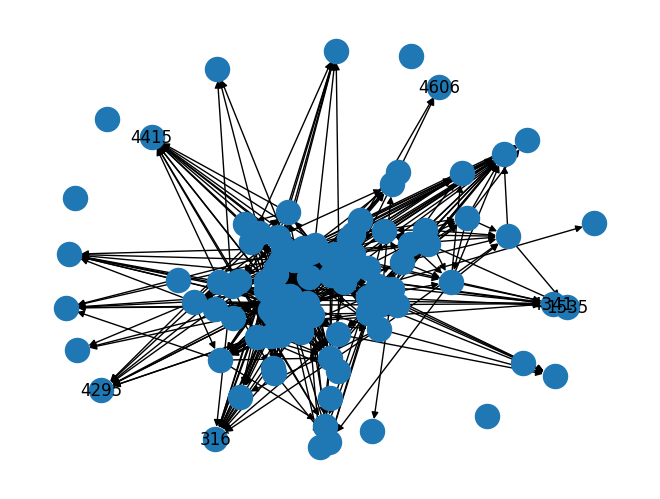

In [107]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

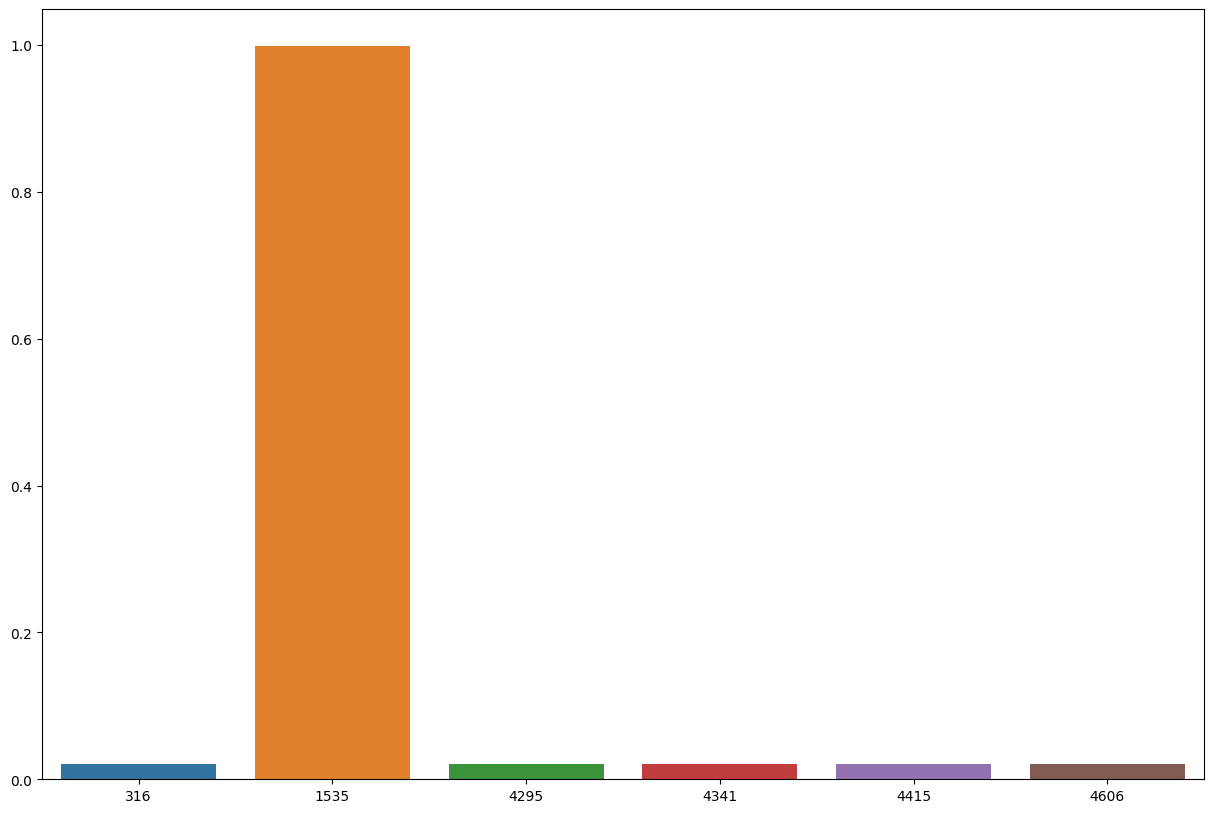

In [46]:
eigv = nx.eigenvector_centrality(graph, max_iter = 1000)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

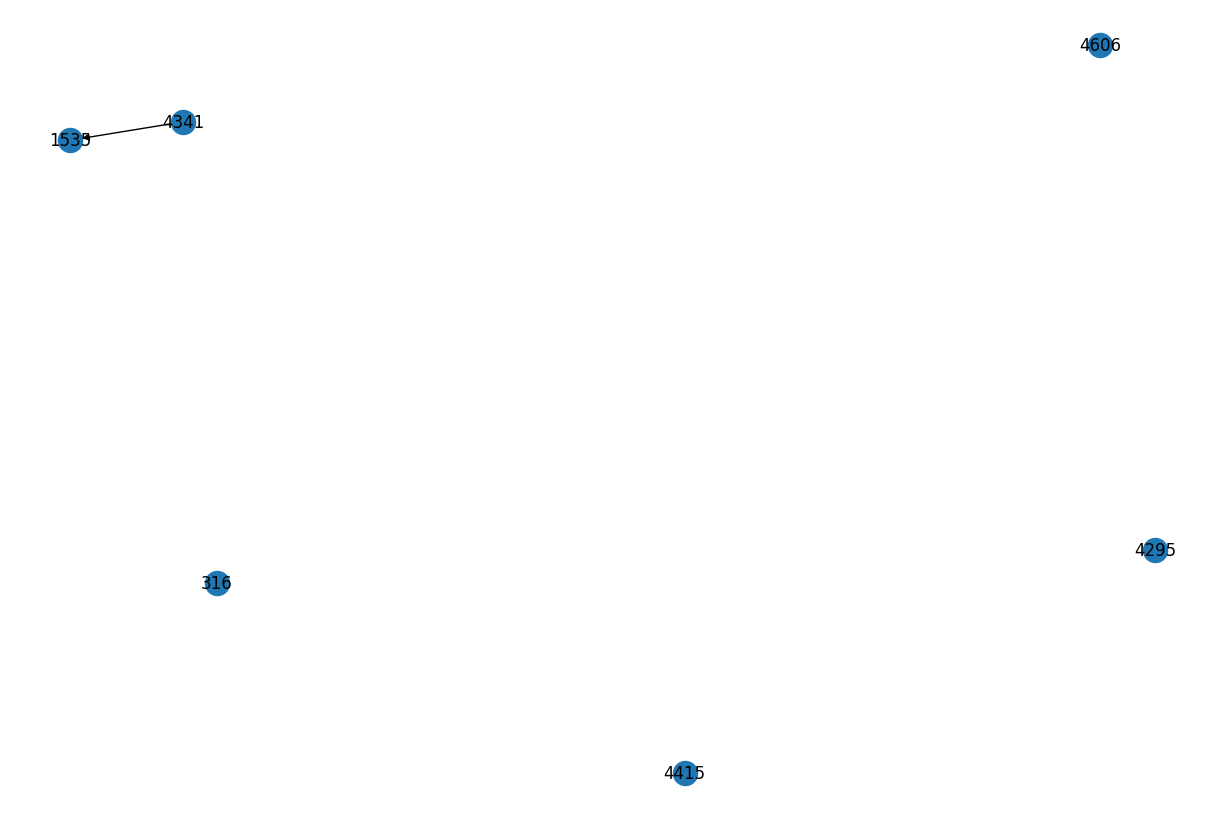

In [108]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_eigv = nx.DiGraph()
graph_eigv.add_edges_from(edges)
graph_eigv.add_nodes_from(nodes)
pos_eigv = nx.spring_layout(graph_eigv)

plt.figure(figsize=(12,8))
nx.draw(graph_eigv, pos_eigv, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_eigv, pos_eigv, labels)
plt.show()

PageRank

<Figure size 1500x1000 with 0 Axes>

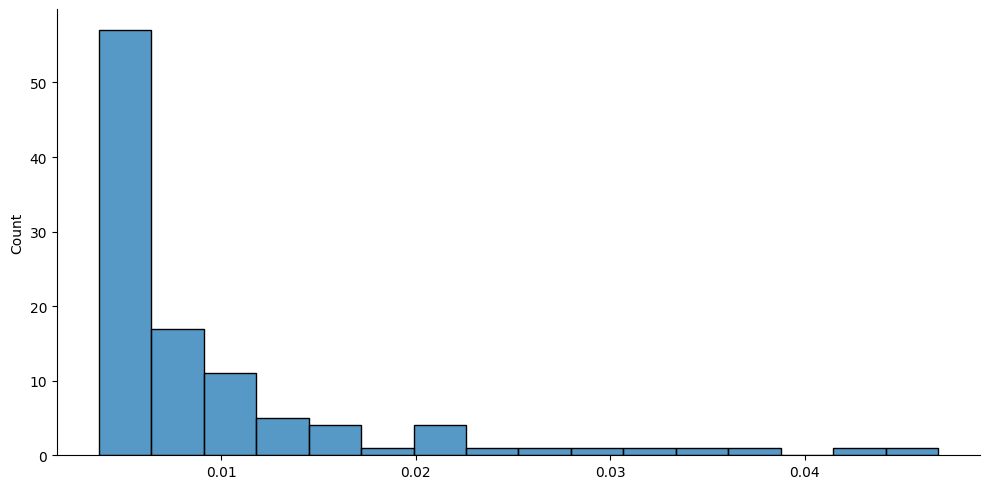

In [109]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

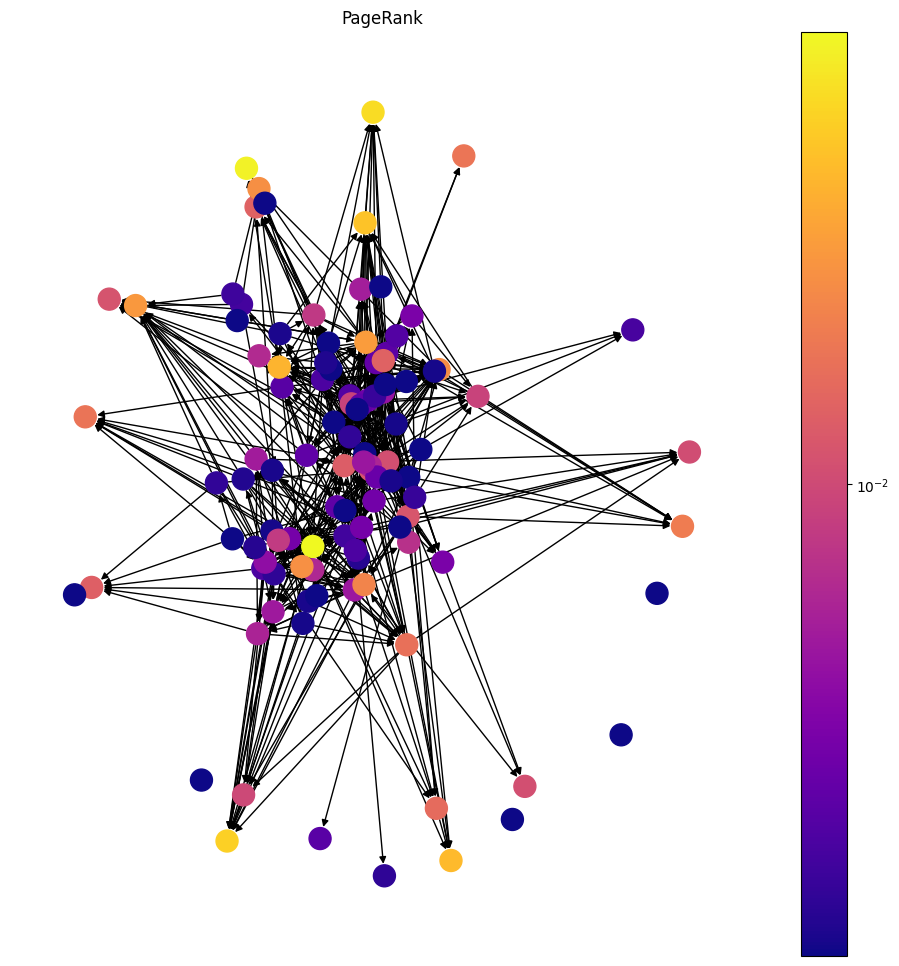

In [48]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

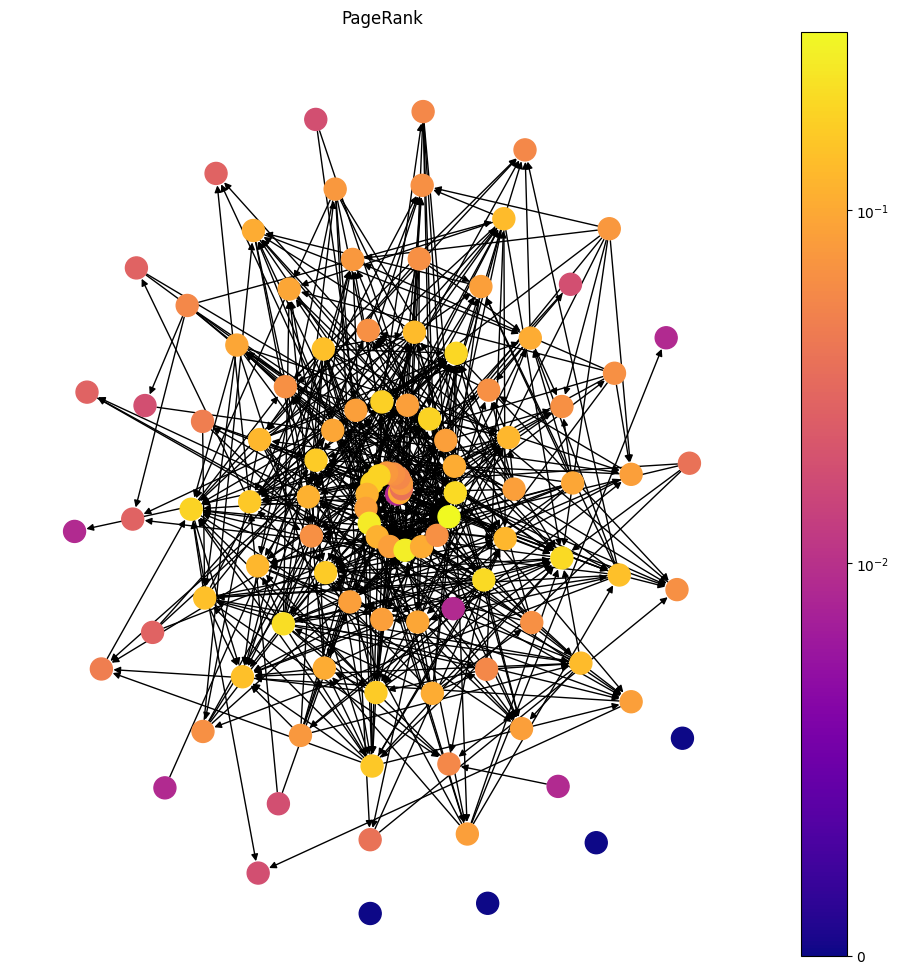

In [49]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{4208: Text(-0.4288383578615309, 0.6156530102245374, '4208'),
 2336: Text(-0.5783676646032585, 0.7902671492283104, '2336'),
 2093: Text(0.9274703779166927, -0.3545002411383966, '2093'),
 4151: Text(-0.05855601783723006, -0.06657340855200988, '4151'),
 316: Text(-0.7586485288497746, 0.5219259062475804, '316')}

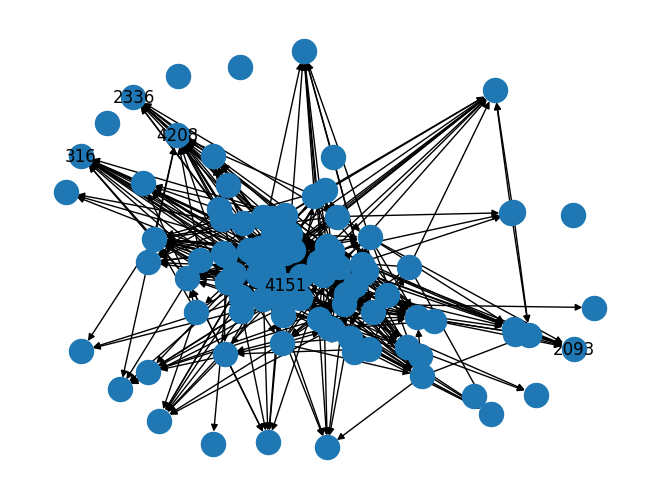

In [110]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.03: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

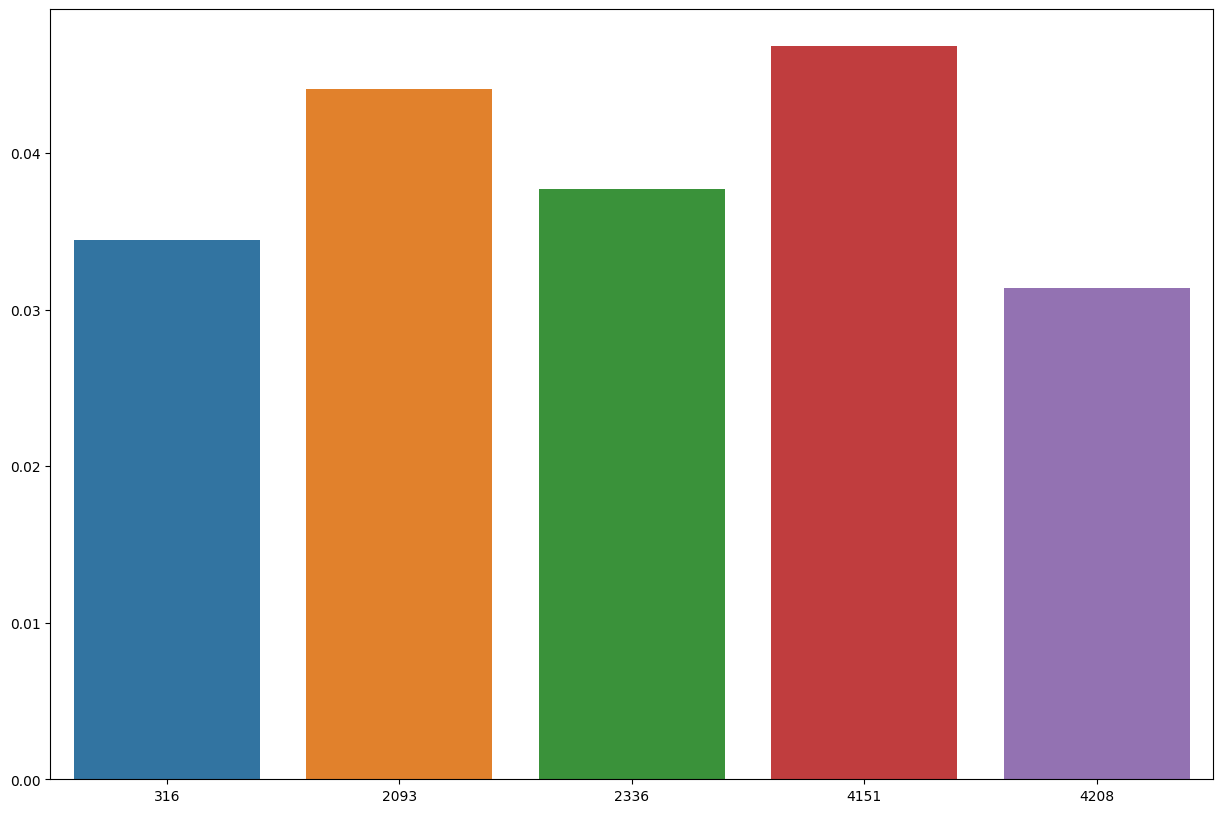

In [51]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in pager.items():
    if value > 0.03: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

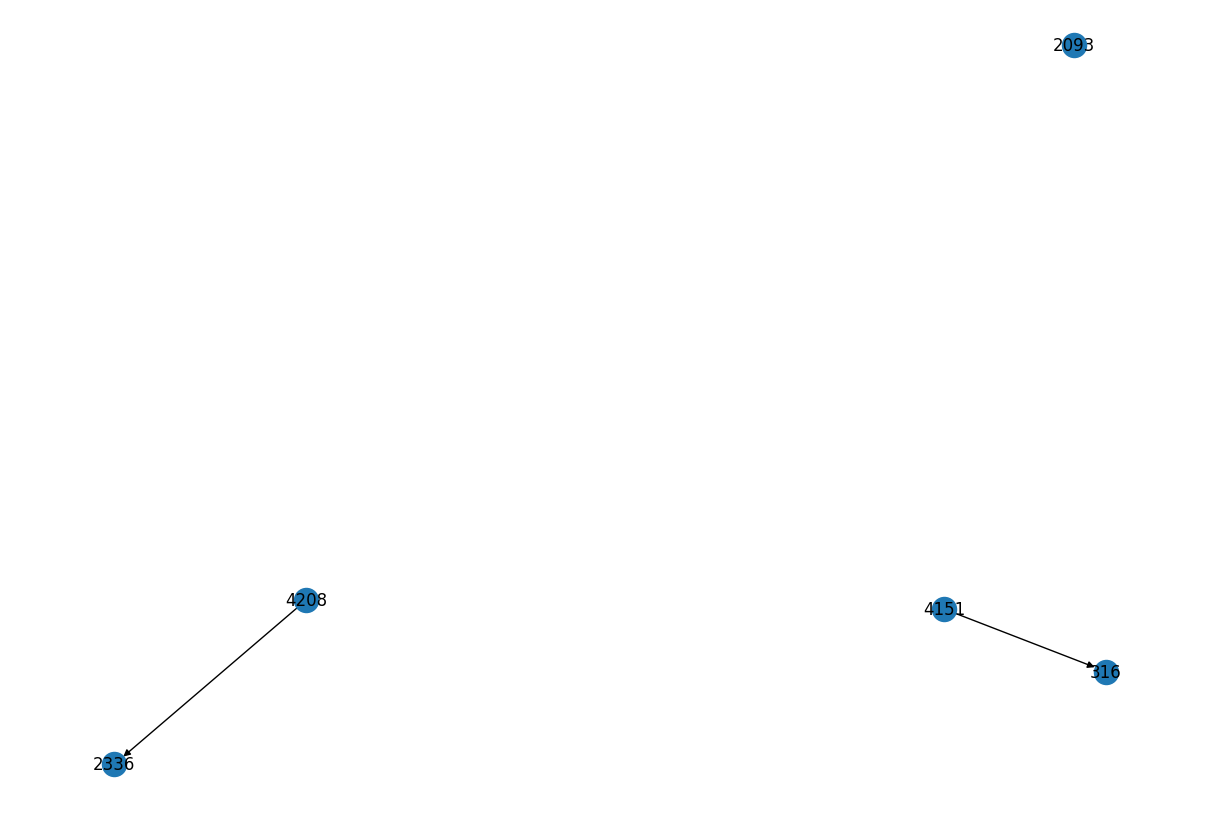

In [111]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_pager = nx.DiGraph()
graph_pager.add_edges_from(edges)
graph_pager.add_nodes_from(nodes)
pos_pager = nx.spring_layout(graph_pager)

plt.figure(figsize=(12,8))
nx.draw(graph_pager, pos_pager, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_pager, pos_pager, labels)
plt.show()

### Analisi delle strutture

Communites

In [71]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({5,
            68,
            109,
            182,
            419,
            536,
            560,
            588,
            809,
            1002,
            1026,
            1089,
            1143,
            1217,
            1438,
            1455,
            1486,
            1496,
            1919,
            2093,
            2201,
            2205,
            2218,
            2278,
            2336,
            2388,
            2399,
            2432,
            2475,
            2490,
            2506,
            2560,
            2839,
            2865,
            3021,
            3111,
            3122,
            3186,
            3387,
            3784,
            4001,
            4064,
            4142}),
 frozenset({19,
            316,
            347,
            367,
            492,
            562,
            724,
            735,
            784,
            872,
            915,
            1018,
            1019,
            11

In [72]:
len(communities)

8

In [33]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos)

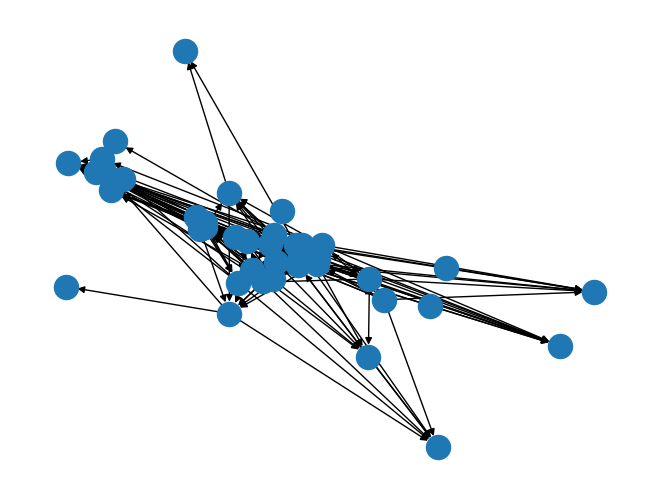

In [64]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[0])
graph_comm1 = grafo(communities[0], edges)
visualizza(graph_comm1)

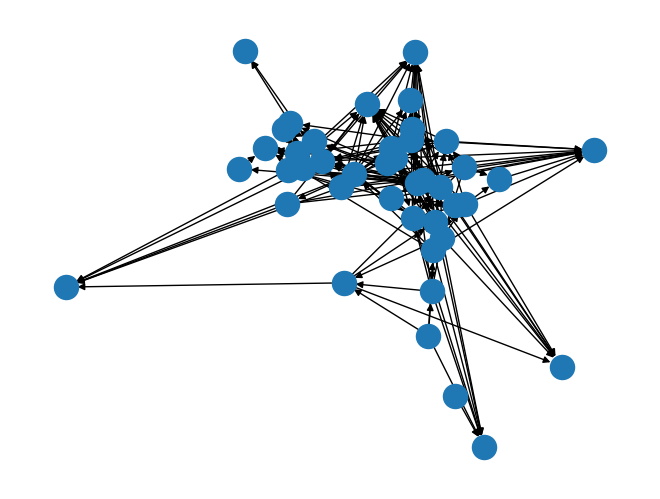

In [65]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[1])
graph_comm2 = grafo(communities[1], edges)
visualizza(graph_comm2)

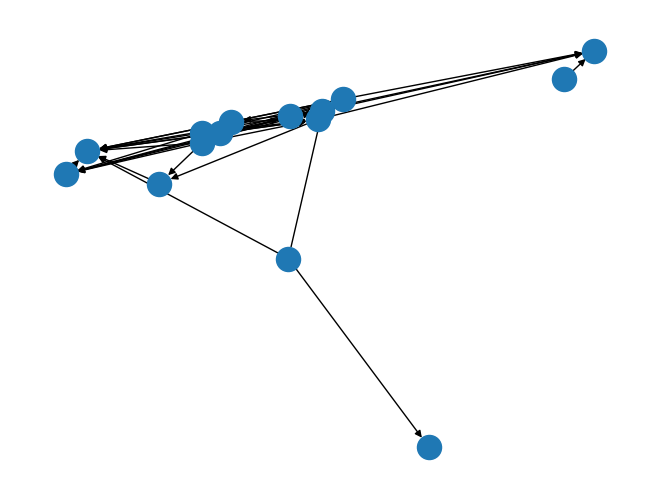

In [66]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[2])
graph_comm3 = grafo(communities[2], edges)
visualizza(graph_comm3)

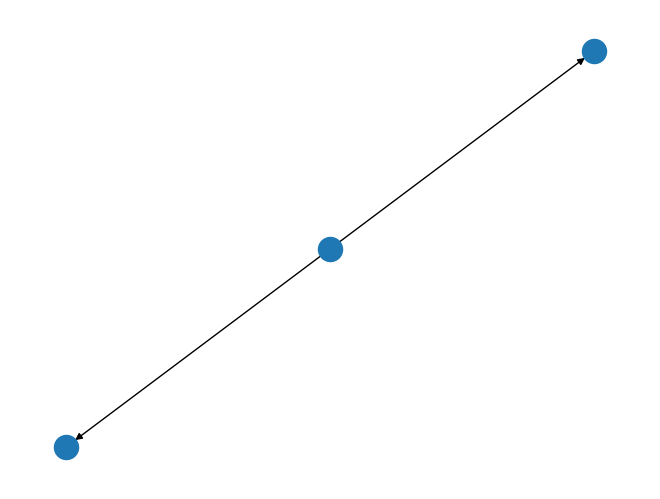

In [63]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[3])
graph_comm4 = grafo(communities[3], edges)
visualizza(graph_comm4)